In [1]:
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\91771\Desktop\Innomatic\EDA\Pandas\Assingment Task\futuristic_city_traffic.csv")
df

,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
0,SolarisVille,Drone,Snowy,Stable,Sunday,20,29.4268,0,0,14.7134,0.5241
1,AquaCity,Flying Car,Solar Flare,Recession,Wednesday,2,118.8000,0,0,143.5682,0.3208
2,Neuroburg,Autonomous Vehicle,Solar Flare,Recession,Wednesday,16,100.3904,0,0,91.2640,0.0415
3,Ecoopolis,Drone,Clear,Booming,Thursday,8,76.8000,1,0,46.0753,0.1811
4,AquaCity,Autonomous Vehicle,Solar Flare,Stable,Saturday,16,45.2176,0,0,40.1934,0.4544
...,...,...,...,...,...,...,...,...,...,...,...
1219562,SolarisVille,Autonomous Vehicle,Electromagnetic Storm,Booming,Wednesday,13,75.7534,0,0,60.6027,0.3840
1219563,MetropolisX,Drone,Snowy,Booming,Saturday,1,24.7660,0,0,14.8122,0.5526
1219564,Neuroburg,Autonomous Vehicle,Snowy,Booming,Monday,19,75.6292,0,0,61.8568,0.0564
1219565,MetropolisX,Autonomous Vehicle,Clear,Booming,Monday,1,52.7983,0,0,85.7116,0.5079


In [3]:
df.head(3)

,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
0,SolarisVille,Drone,Snowy,Stable,Sunday,20,29.4268,0,0,14.7134,0.5241
1,AquaCity,Flying Car,Solar Flare,Recession,Wednesday,2,118.8000,0,0,143.5682,0.3208
2,Neuroburg,Autonomous Vehicle,Solar Flare,Recession,Wednesday,16,100.3904,0,0,91.2640,0.0415


# Data Manupulation Task 

## 1. Calculate the average energy consumption for each economic condition.

In [4]:
df.groupby('Economic Condition')['Energy Consumption'].mean()

Economic Condition
Booming      49.322140
Recession    49.690856
Stable       49.380913
Name: Energy Consumption, dtype: float64

## 2. Calculate the correlation between traffic density and energy consumption.

In [5]:
df['Traffic Density'].corr(df['Energy Consumption'])

0.01574029064135534

## 3. Find the day of the week with the highest average speed.

In [6]:
df.groupby('Day Of Week')['Speed'].mean().idxmax()

'Wednesday'

## 4. Identify the city with the lowest average traffic density during snowy weather.

In [7]:
x=df[df['Weather']=='Snowy']
x.groupby('City')['Traffic Density'].mean().idxmin()

'Neuroburg'

## 5 Identify the city with the highest average traffic density.

In [8]:
df.groupby('City')['Traffic Density'].mean().idxmax()

'MetropolisX'

## 6.Determine the percentage of random events that occurred in the dataset.

In [9]:
x = int(df["Random Event Occurred"].count())
y = int(df[df["Random Event Occurred"]==1].count()[0])
per = (y/x)*100
per

4.988737806122993

## 7. Find the city with the highest average speed during peak hours.

In [10]:
x=df[df['Is Peak Hour']==1]
x.groupby('City')['Speed'].mean().idxmax()

'Neuroburg'

## 8. Calculate the percentage of data entries where a random event occurred on a Sunday.

In [11]:
sunday_random_events = df[(df['Day Of Week'] == 'Sunday') & (df['Random Event Occurred'] == 1)]
percentage_random_events_sunday = (len(sunday_random_events) / len(df[df['Day Of Week'] == 'Sunday'])) * 100
percentage_random_events_sunday


5.04191044913504

## 9. Identify the most common vehicle type in the dataset


In [12]:
 df['Vehicle Type'].mode()[0]


'Autonomous Vehicle'

# Data Visualization Task 

In [13]:
df.head(3)

,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
0,SolarisVille,Drone,Snowy,Stable,Sunday,20,29.4268,0,0,14.7134,0.5241
1,AquaCity,Flying Car,Solar Flare,Recession,Wednesday,2,118.8000,0,0,143.5682,0.3208
2,Neuroburg,Autonomous Vehicle,Solar Flare,Recession,Wednesday,16,100.3904,0,0,91.2640,0.0415


### 1. Plot the best suitable chart to compare traffic density across different economic conditions.

Text(0.5, 1.0, 'Traffic Density Across Different Economic Conditions')

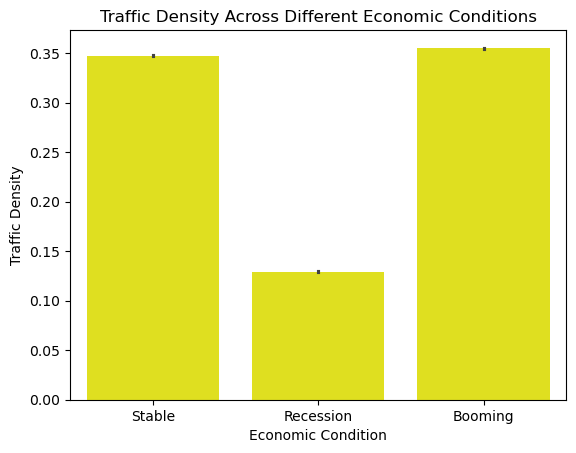

In [14]:
sns.barplot(data=df, x='Economic Condition',y= 'Traffic Density',color = 'Yellow')
plt.title('Traffic Density Across Different Economic Conditions')

## 2. Correlation between speed and energy consumption

Text(0.5, 1.0, 'Correlation Between Speed and Energy Consumption')

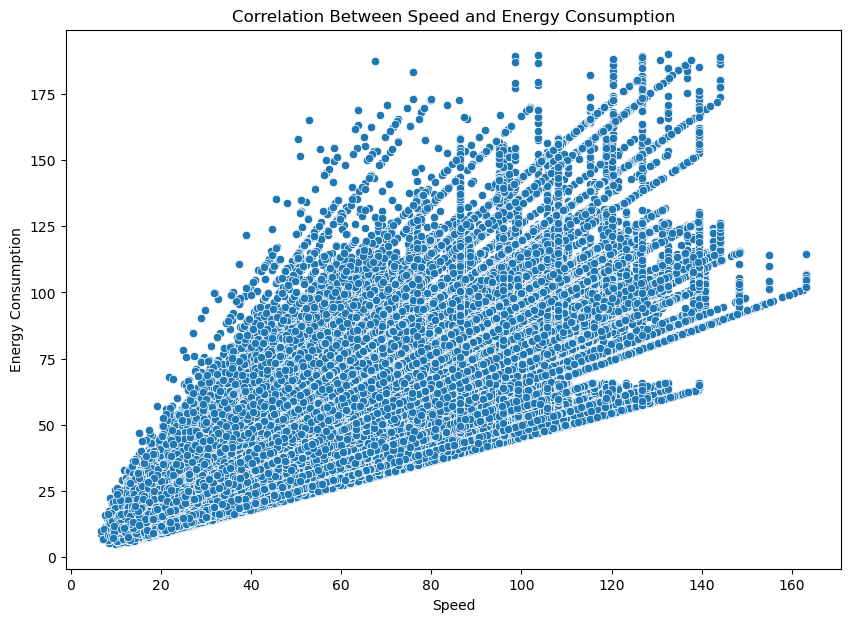

In [15]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Speed', y='Energy Consumption', data=df)
plt.title('Correlation Between Speed and Energy Consumption')

## 3. Average speed for each hour of the day


In [16]:
avg_speed_by_hour = df.groupby('Hour Of Day')['Speed'].mean()
avg_speed_by_hour

Hour Of Day
0     59.473671
1     59.612197
2     59.512896
3     59.403996
4     59.352236
5     59.622385
6     59.539986
7     61.324948
8     61.273701
9     59.925444
10    59.516793
11    59.526893
12    60.252827
13    60.441731
14    60.169785
15    59.644404
16    59.621863
17    61.260261
18    61.935667
19    59.441231
20    59.363926
21    59.476128
22    59.482555
23    59.505069
Name: Speed, dtype: float64

Text(0, 0.5, 'Average Speed')

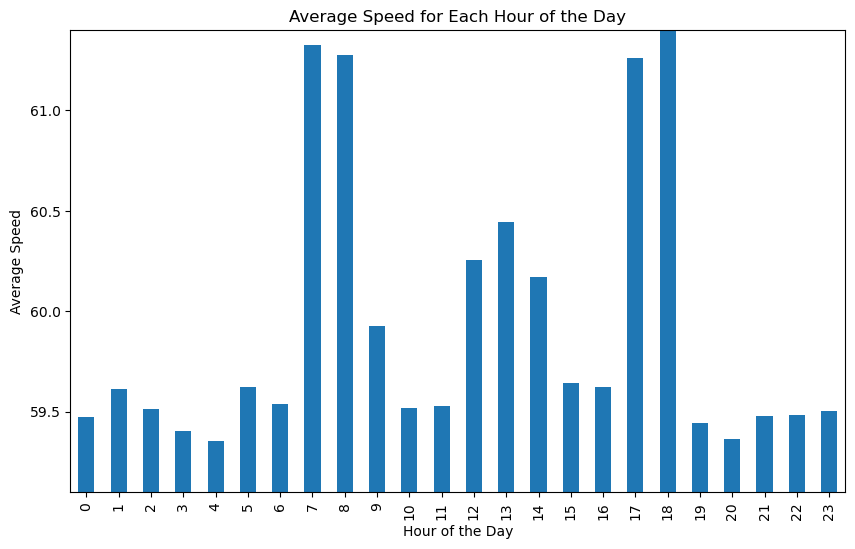

In [17]:
plt.figure(figsize=(10, 6))
avg_speed_by_hour.plot(kind='bar')
plt.title('Average Speed for Each Hour of the Day')
plt.ylim(59.1,61.4)
plt.xlabel('Hour of the Day')
plt.ylabel('Average Speed')

### 4. Plot the best suitable chart to show the average energy consumption for each day of the week.

In [18]:
avg_energy_consumption = df.groupby('Day Of Week')['Energy Consumption'].mean()
avg_energy_consumption

Day Of Week
Friday       49.502924
Monday       49.416627
Saturday     49.571943
Sunday       49.514514
Thursday     49.372312
Tuesday      49.435535
Wednesday    49.439182
Name: Energy Consumption, dtype: float64

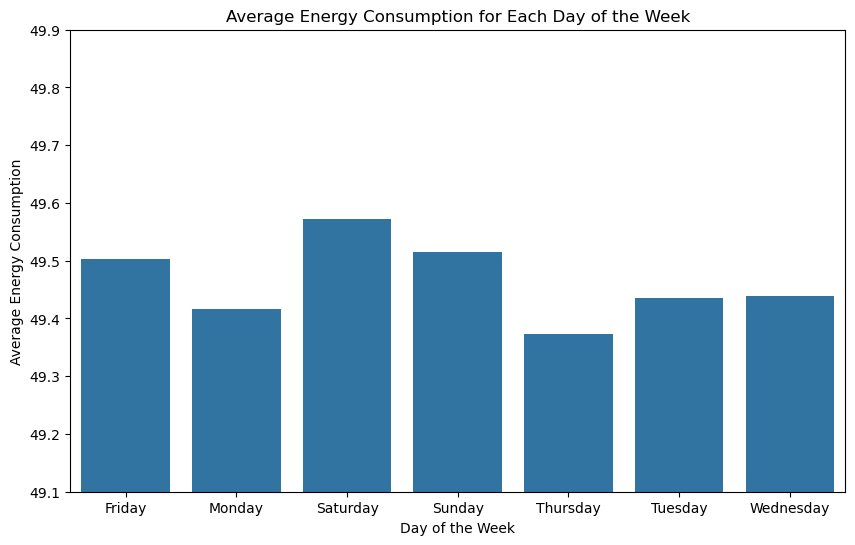

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_energy_consumption.index, y=avg_energy_consumption.values)
plt.ylim(49.1,49.9)
plt.title('Average Energy Consumption for Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Energy Consumption')
plt.show()

## 5 .Plot the best suitable chart to compare the average traffic density for each city.

In [20]:
# Assuming df has 'city' and 'traffic_density' columns
avg_traffic_density = df.groupby('City')['Traffic Density'].mean()
avg_traffic_density

City
AquaCity        0.447340
Ecoopolis       0.192789
MetropolisX     0.461818
Neuroburg       0.074413
SolarisVille    0.290551
TechHaven       0.195952
Name: Traffic Density, dtype: float64

C:\Users\91771\AppData\Local\Temp\ipykernel_10672\3328599079.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_traffic_density.index, y=avg_traffic_density.values, palette='coolwarm')


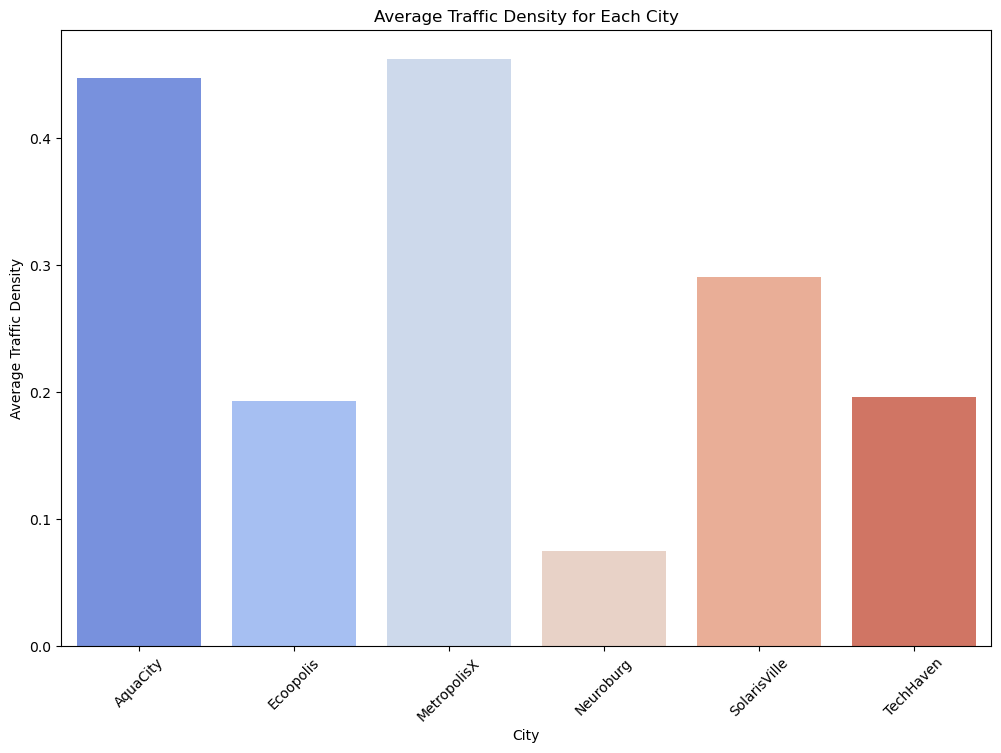

In [21]:
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_traffic_density.index, y=avg_traffic_density.values, palette='coolwarm')
plt.title('Average Traffic Density for Each City')
plt.xlabel('City')
plt.ylabel('Average Traffic Density')
plt.xticks(rotation=45)
plt.show()

In [22]:
# Assuming avg_traffic_density is already calculated
#avg_traffic_density = df.groupby('City')['Traffic Density'].mean()

# Plot without hue and palette
#plt.figure(figsize=(10, 6))
#sns.barplot(x=avg_traffic_density.index, y=avg_traffic_density.values)
#plt.title('Average Traffic Density for Each City')
#plt.xlabel('City')
#plt.ylabel('Average Traffic Density')
#plt.xticks(rotation=45)  # Rotate x-axis labels if needed
#plt.show()

### 6. Plot the best suitable chart to visualize the distribution of speed.

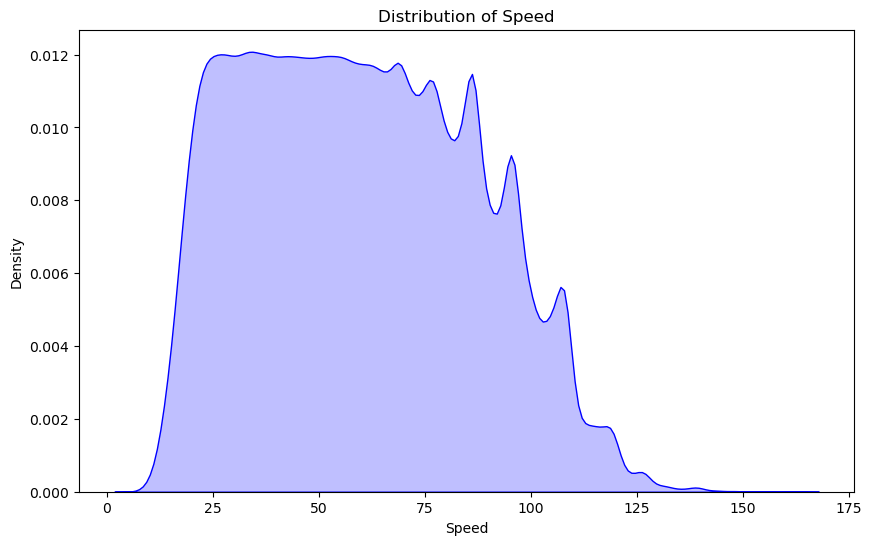

In [23]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Speed'], fill=True, color='blue')
plt.title('Distribution of Speed')
plt.xlabel('Speed')
plt.ylabel('Density')
plt.show()

### 7. Plot the best suitable chart to show the distribution of vehicle types in the dataset.

C:\Users\91771\AppData\Local\Temp\ipykernel_10672\1599561129.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Vehicle Type', data=df, palette='Set2')


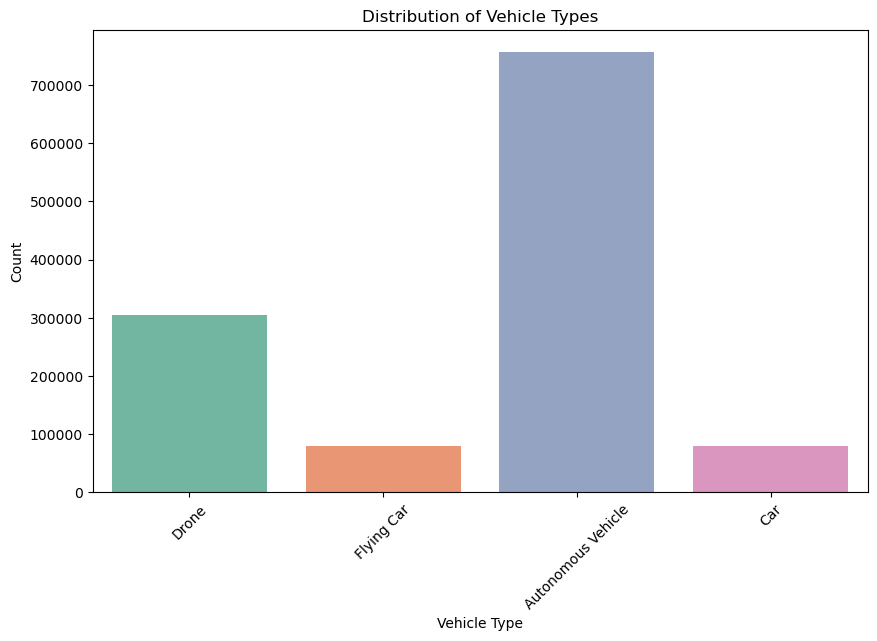

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Vehicle Type', data=df, palette='Set2')
plt.title('Distribution of Vehicle Types')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### 8. Plot the best suitable chart to visualize the distribution of traffic density during different weather conditions.

C:\Users\91771\AppData\Local\Temp\ipykernel_10672\2598624616.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weather', y='Traffic Density', data=df, palette='muted')


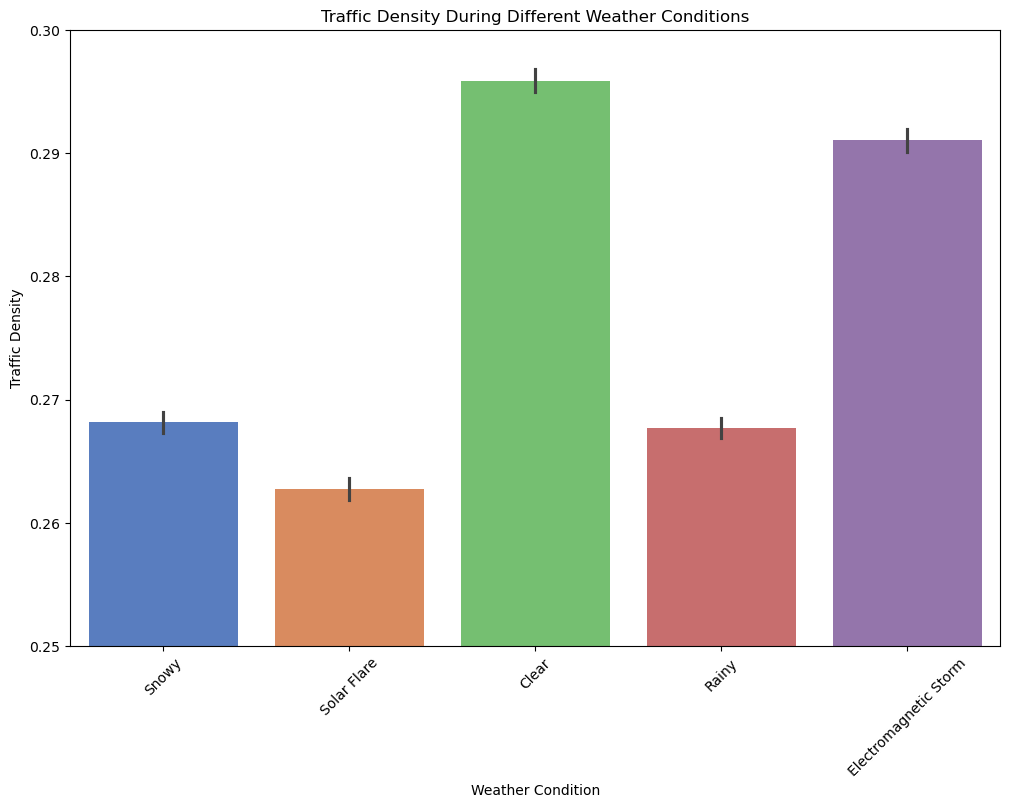

In [25]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Weather', y='Traffic Density', data=df, palette='muted')
plt.title('Traffic Density During Different Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylim(0.25,0.30)
plt.ylabel('Traffic Density')
plt.xticks(rotation=45)
plt.show()

### 9. Plot the best suitable chart to visualize the correlation matrix of numeric attributes.

In [26]:
correlation_matrix = df.corr()
correlation_matrix

C:\Users\91771\AppData\Local\Temp\ipykernel_10672\868109210.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
Hour Of Day,1.000000,0.002821,0.069198,-0.001731,-0.002427,-0.014640
Speed,0.002821,1.000000,0.037067,-0.000292,0.840122,-0.028211
Is Peak Hour,0.069198,0.037067,1.000000,0.000937,-0.030469,0.024909
Random Event Occurred,-0.001731,-0.000292,0.000937,1.000000,-0.000764,0.000132
Energy Consumption,-0.002427,0.840122,-0.030469,-0.000764,1.000000,0.015740
Traffic Density,-0.014640,-0.028211,0.024909,0.000132,0.015740,1.000000


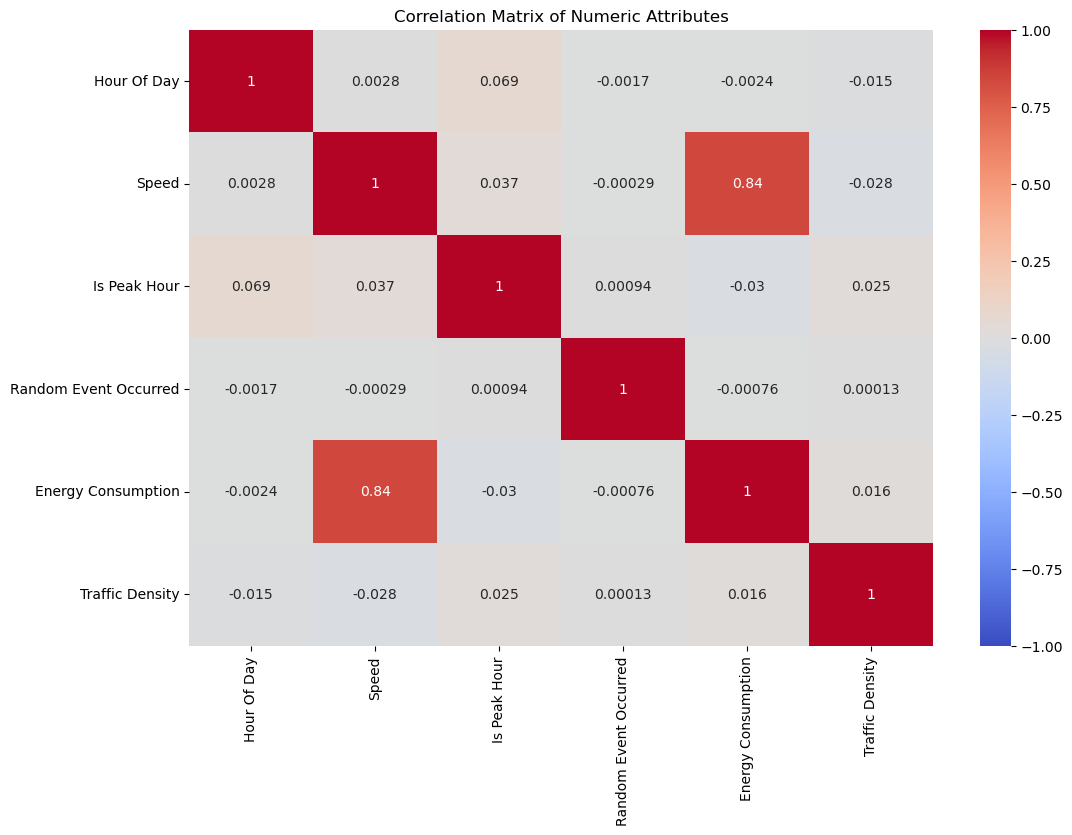

In [27]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Attributes')
plt.show()

### 10.Calculate the proportion of entries where a random event occurred during a recession.

In [28]:
recession_data = df[df['Economic Condition'] == 'Recession']
proportion_random_recession = (recession_data['Random Event Occurred'].mean()) * 100
print("\nProportion of entries where a random event occurred during a recession:", proportion_random_recession)



Proportion of entries where a random event occurred during a recession: 4.97010362273748


### 11. Plot the best suitable chart to explore the relationship between speed and traffic density.

In [ ]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='Speed', y='Traffic Density', data=df)
plt.title('Relationship Between Speed and Traffic Density')
plt.xlabel('Speed')
plt.ylabel('Traffic Density')
plt.show()

In [ ]:
sns.jointplot(x='Speed', y='Traffic Density', data=df, kind='scatter')
plt.show()